<a href="https://www.kaggle.com/code/surajsingh9/notebook7fda1d58d1?scriptVersionId=136217865" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Import Libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder


In [3]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['hour']=df['Time'].apply(lambda x:int(x/3600)%24)

In [12]:
df['hour']

0          0
1          0
2          0
3          0
4          0
          ..
284802    23
284803    23
284804    23
284805    23
284806    23
Name: hour, Length: 283726, dtype: int64

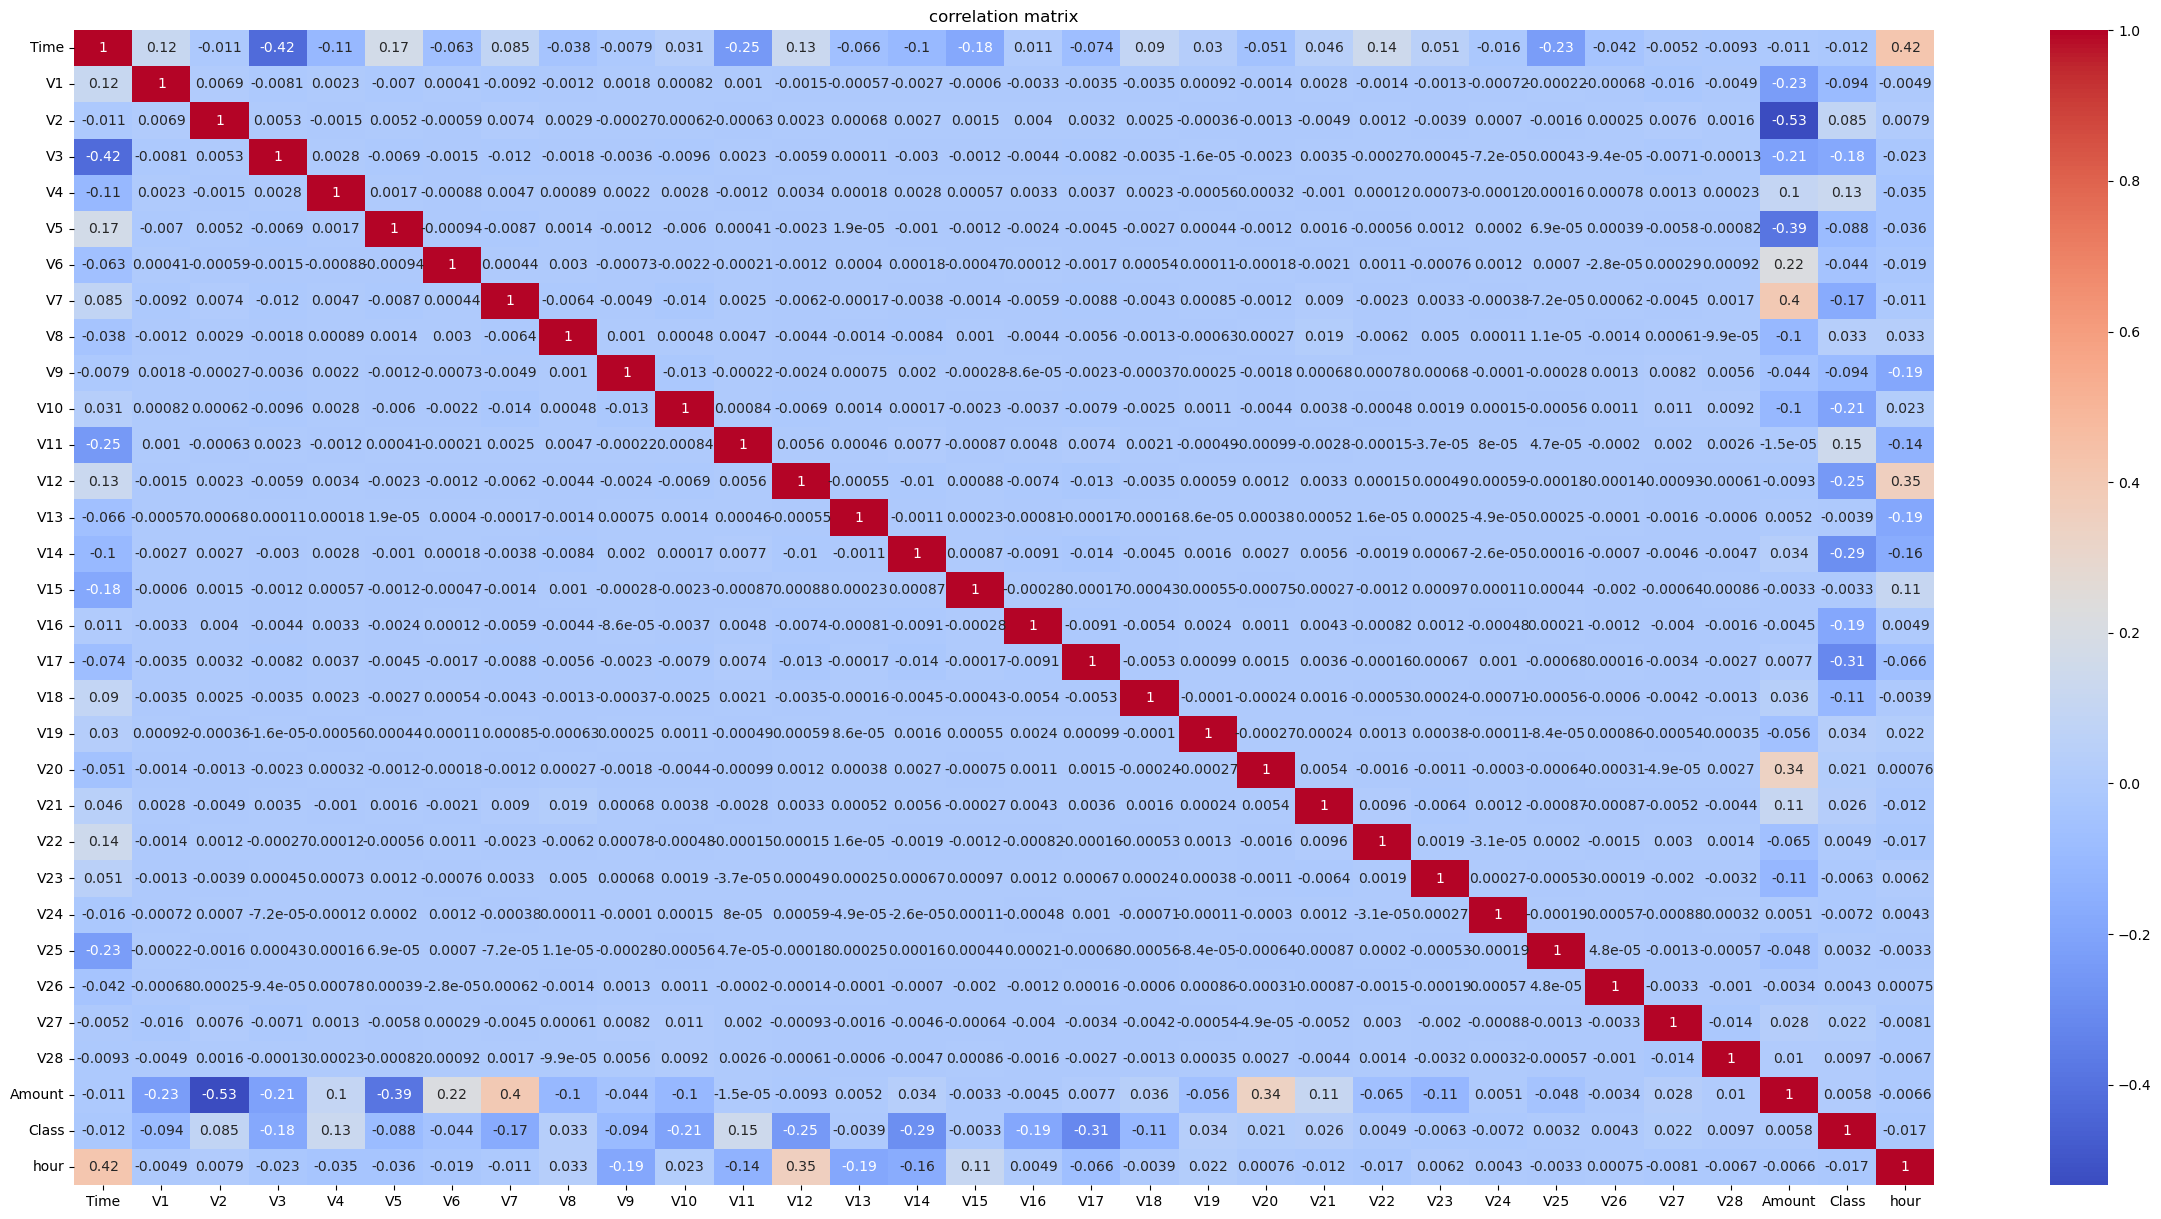

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

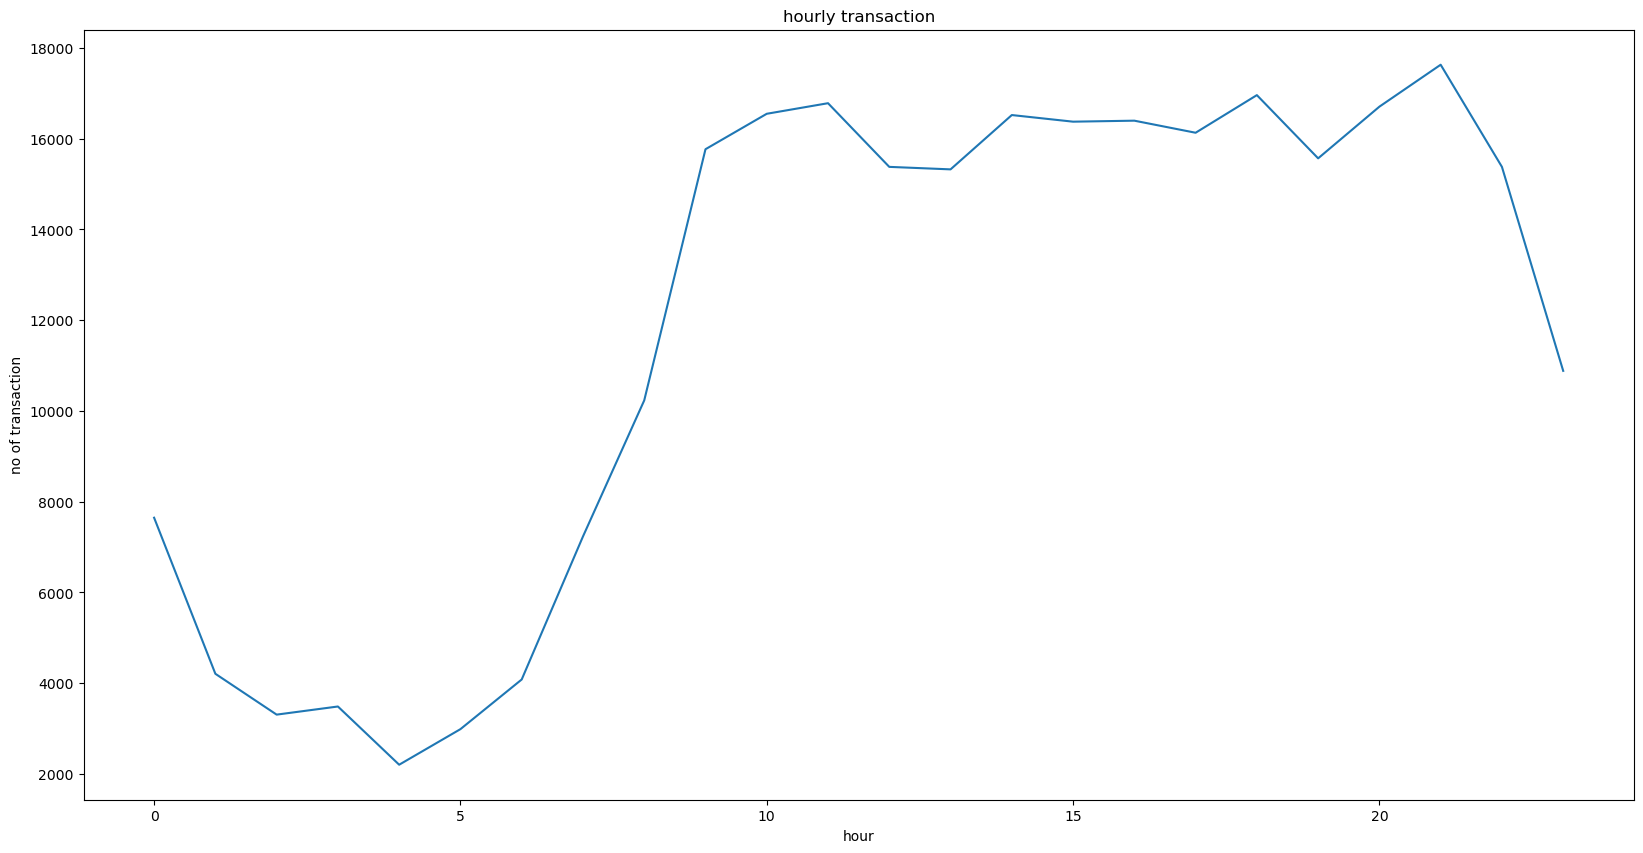

In [14]:
plt.figure(figsize=(20,10))
hourly_count=df.groupby('hour')['Class'].count()
plt.plot(hourly_count.index,hourly_count.values)
plt.xlabel('hour')
plt.ylabel('no of transaction')
plt.title('hourly transaction')
plt.show()

scaling

In [15]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x=df.drop('Class',axis=1)
y=df['Class']
s=scaler.fit_transform(x)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
66180,51925.0,1.070955,-0.078874,1.292059,0.909860,-0.619474,0.700183,-0.819441,0.326603,0.277624,...,0.334072,1.053547,-0.121797,-0.252695,0.346203,-0.227956,0.094149,0.032094,23.72,14
56167,47296.0,1.184662,-0.216035,0.651774,-0.168070,-0.769154,-0.379905,-0.482859,0.188342,0.333287,...,-0.058520,-0.224482,0.157778,0.247821,-0.060009,0.908928,-0.066832,-0.005374,0.77,13
135820,81412.0,-0.971703,1.302882,1.268047,1.314419,0.024054,0.828559,-0.521187,-2.474202,-1.089367,...,-1.177430,0.915593,0.018496,0.253259,-0.255047,-0.289566,0.190421,0.157902,42.50,22
170920,120412.0,-0.704591,1.485154,1.431901,4.406176,0.011303,1.292110,-0.494689,0.782817,-1.426212,...,0.257596,0.884315,0.117887,0.602996,-0.588804,0.429118,0.254979,0.182545,4.31,9
116157,74166.0,1.171163,-0.425147,0.712189,0.444927,-0.440770,1.111524,-0.945006,0.530904,1.012615,...,-0.107680,-0.202165,-0.077472,-1.161284,0.246728,0.407246,0.016170,-0.001536,11.50,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22057,32008.0,-0.706218,1.385400,0.924749,0.107177,-0.265951,-1.004216,0.441039,0.314758,-0.662429,...,-0.205446,-0.650612,0.066489,0.348723,-0.109630,0.071721,0.119551,0.037039,17.99,8
99282,67050.0,-0.781540,1.409576,1.365038,0.073250,-0.418868,-1.092919,0.479953,0.248230,-0.828106,...,-0.142763,-0.415835,0.067697,0.734289,-0.157507,0.047935,0.148878,0.065337,8.95,18
249451,154415.0,0.091039,-0.101418,0.328395,0.347264,-0.034880,0.124143,0.373088,-0.052965,-1.215088,...,-0.058954,0.266763,0.461562,0.614083,-1.337972,-0.734817,0.339013,0.320692,106.45,18
2192,1713.0,1.225644,-0.012554,0.597783,0.804614,-0.646776,-0.620397,-0.126092,-0.116853,0.610122,...,-0.089763,-0.007947,-0.088392,0.451556,0.567707,0.543646,-0.023340,0.009877,9.00,0


In [17]:
y_train

66180     0
56167     0
135820    0
170920    0
116157    0
         ..
22057     0
99282     0
249451    0
2192      0
24499     0
Name: Class, Length: 226980, dtype: int64

In [18]:
print("Length of x_train id:{x_train}".format(x_train=len(x_train)))
print("Length of x_test id:{x_test}".format(x_test=len(x_test)))
print("length of y_train id:{y_train}".format(y_train=len(y_train)))
print("length of y_tes id:{y_test}".format(y_test=len(y_test)))

Length of x_train id:226980
Length of x_test id:56746
length of y_train id:226980
length of y_tes id:56746


In [19]:
y_train=np.array(y_train).reshape(-1)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
dlt=RandomForestClassifier()
dlt.fit(x_train,y_train)


RandomForestClassifier()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
y_pred=dlt.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9994537059880872


In [24]:
Confusion_matrix=confusion_matrix(y_test,y_pred)
print(Confusion_matrix)

[[56635     3]
 [   28    80]]


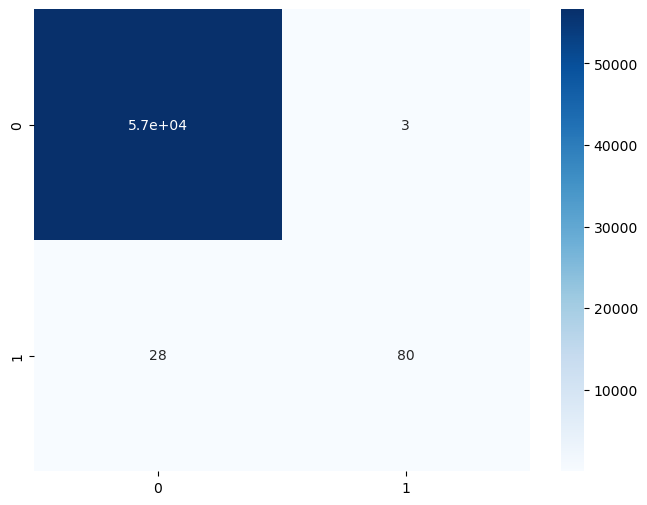

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(Confusion_matrix,annot=True,cmap='Blues')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
parameter={'min_samples_leaf':[1,2,3],
          'max_depth':[1,2,3]}
grid_search=GridSearchCV(dlt,parameter,cv=5)
grid_search.fit(x_train,y_train)
#get best Model
grid_search.best_estimator_

RandomForestClassifier(max_depth=3)

In [27]:
from sklearn.tree import export_graphviz
import graphviz

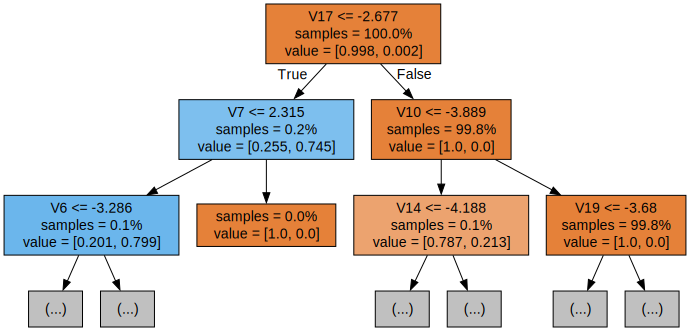

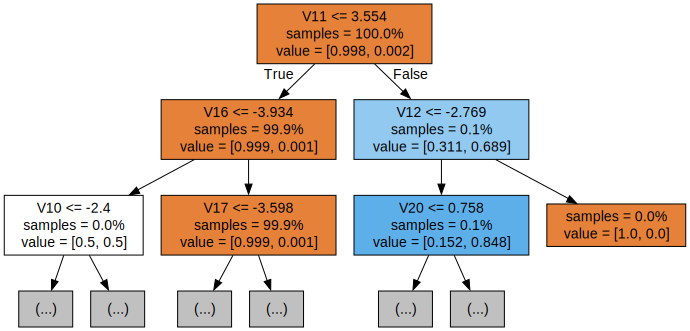

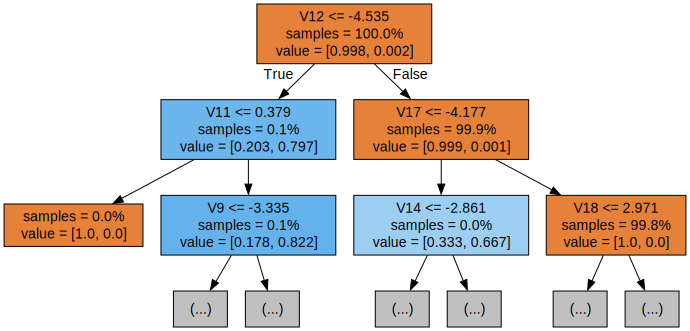

In [28]:
for i in range(3):
    tree=dlt.estimators_[i]
    dot_data=export_graphviz(tree,
                           feature_names=x_train.columns,
                           filled=True,
                           max_depth=2,
                           impurity=False,
                           proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)

<Axes: >

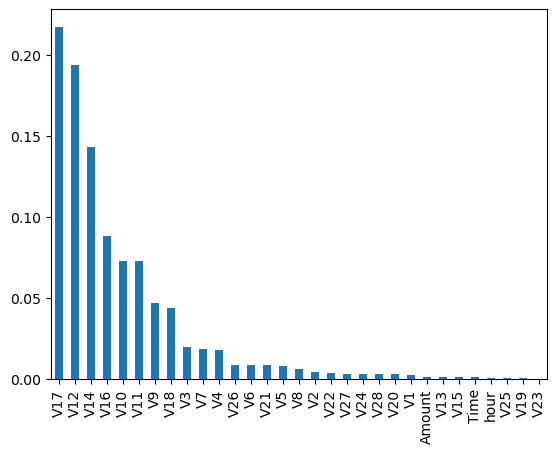

In [29]:
best=grid_search.best_estimator_
feature_importances=pd.Series(best.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()